In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Data Detail
- datetime - hourly date + timestamp  
- season
    1. spring
    2. summer
    3. fall
    4. winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [2]:
train = pd.read_csv("bike-train.csv")
print(train.shape)
train.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
test = pd.read_csv('bike-test.csv')
print(test.shape)
test.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [4]:
subm = pd.read_csv('bike-sampleSubmission.csv')
print(subm.shape)
subm.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


# Preprocessing

In [5]:
print('train has NaN?', train.isnull().any())
print('test has NaN?', test.isnull().any())

('train has NaN?', datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool)
('test has NaN?', datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool)


In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])
keys = ['year', 'month', 'day', 'hour', 'minute', 'second']
# 아래 코드가 왜 안되는지 확인해볼것
# for key in keys:
#     train['datetime-' + key] = train['datetime'].dt[key]
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek
print(train.shape)
train[['datetime-year','datetime-month','datetime-day','datetime-hour', 'datetime-minute', 'datetime-second']].head(3)

(10886, 19)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0


In [7]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek
print(test.shape)
test[['datetime-year','datetime-month','datetime-day','datetime-hour', 'datetime-minute', 'datetime-second']].head(3)

(6493, 16)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,20,0,0,0
1,2011,1,20,1,0,0
2,2011,1,20,2,0,0


# Exploratory Data Analysis

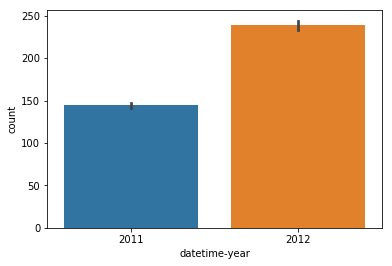

In [8]:
import seaborn as sns
# 2012년이 되면서 회사가 성장하여 전체적인 매출이 늘어난 것일 수 있다
sns.barplot(data=train, x='datetime-year', y='count')

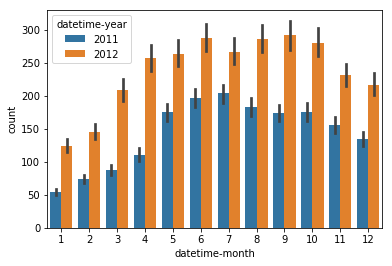

In [9]:
# 12월이 1월과 매우 많은 차이가 난다!
sns.barplot(data=train, x='datetime-month', y='count', hue='datetime-year')

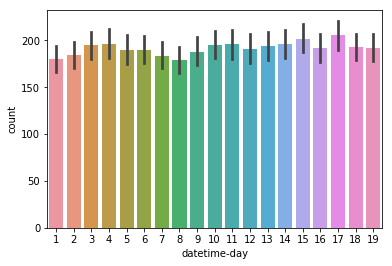

In [10]:
# 정답이 19일 이후를 맞추는 것이기 때문에 자료는 19일까지만
# 그리고 정답이든 아니든 역시 noise...
sns.barplot(data=train, x='datetime-day', y='count')

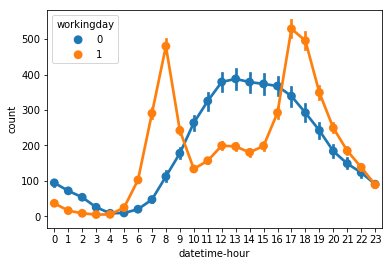

In [11]:
# 피크 시간은 출/퇴근 시간을 나타낸다
sns.pointplot(data=train, x='datetime-hour', y='count', hue='workingday')

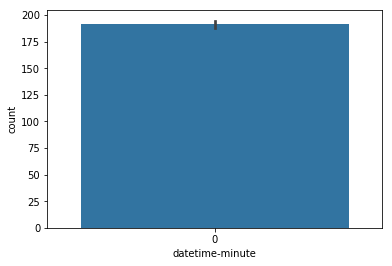

In [12]:
# minute정보는 noise...
sns.barplot(data=train, x='datetime-minute', y='count')

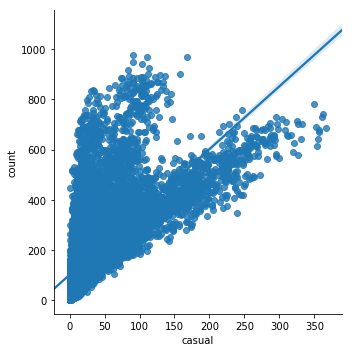

In [13]:
sns.lmplot(data=train, x='casual', y='count')

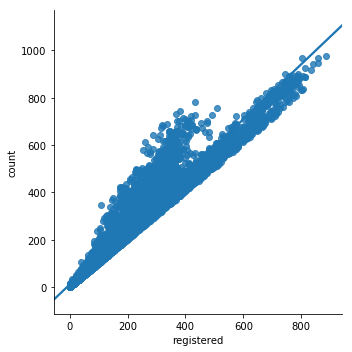

In [14]:
sns.lmplot(data=train, x='registered', y='count')

## Season

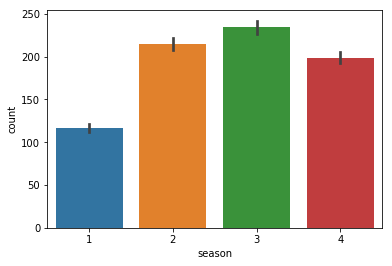

In [15]:
# month/season은 일반적인 우리의 통념과 약간 다른 경향성을 가지고 있다. 
# 봄에 자전거로 가득차는 공원들을 생각해볼 수 있다.
# 봄에 겨울보다 자전거를 덜 빌린다는 것이 말이 안된다.
sns.barplot(data=train, x='season', y='count')

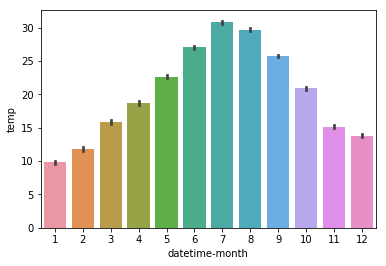

In [16]:
# season은 그냥 4분위일뿐, 실제 봄여름가을겨울이 아니다. 즉 중복 정보라는 뜻.
# 실제로라면 month와 season이 어느정도 일치해야 한다
# 따라서 월을 기준으로 다시 season을 묶어줄 수 있다.
sns.barplot(data=train, x='datetime-month', y='temp')

## Weather

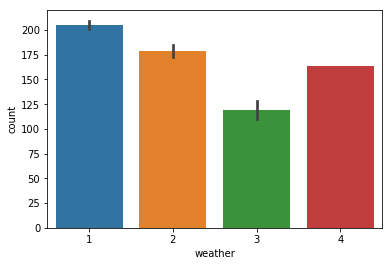

In [17]:
# 4번 날씨는 신뢰 구간이 없다. 자료가 이상한데?
sns.barplot(data=train, x='weather', y='count')

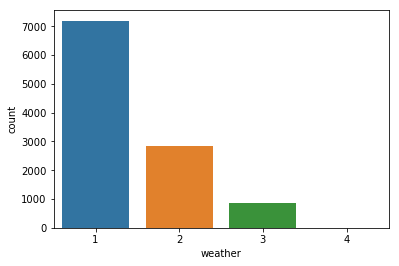

In [18]:
# 실제로 4번 날씨를 확인해보니 해당 정보를 가진 행이 거의 없다?
sns.countplot(data=train, x='weather')

In [19]:
# 확인된 데이터는 단 1개인데, count가 너무 높아서 자료가 왜곡되었다.
train.loc[train['weather'] == 4, ['count','weather']]

,count,weather
5631,164,4


In [20]:
# test 모델에는 4가 포함되어 있다
test.loc[test['weather'] == 4, ['weather']]

,weather
154,4
3248,4


### one-hot encoding

In [21]:
# train모델에서 4를 없애면, test모델의 4에 대응할 수 없다.
# 그러니 4를 최대한 유사한 3으로 보정해주자.
# 또한 머신러닝은 기본적으로 숫자의 연속성을 보려고 하기 때문에, 별도의 인코딩을 시켜주어서 숫자의 연속성을 무너뜨려야 한다.
# 이렇듯 연속적인 자료를 불연속적으로 바꾸는 작업이 one-hot encoding이다.
# 주의할 점은 아웃라이어가 최대한 적도록 분류해야한다는 것
# https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/
# 위의 기본 라이브러리를 이용하여 one-hot encoding 시도해볼 것

# 수동 hot-encode. 물론 테스트 모델에도 똑같이 적용해야 함
# train['season_1'] = train['season'] == 1
# train['season_2'] = train['season'] == 2
# train['season_3'] = train['season'] == 3
# train['season_4'] = train['season'] == 4
# train[['season', 'season_1', 'season_2', 'season_3', 'season_4']].head(3)

In [22]:
# one-hot-encoding (대신 원본 season은 삭제되므로 유의)
# season이 의미가 없는듯하여 실제로는 사용하지 않았다
# pd.get_dummies(train, columns=['season']).head()
# test = pd.get_dummies(test, columns=['season'])

---

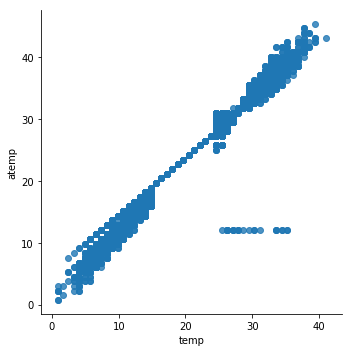

In [23]:
# outlier in atemp...
# 해결방법: atemp와 temp가 비슷하므로 outlier에 대하여 atemp를 그냥 temp로 갈음
# 해결방법2: 비슷한 분포를 가질 때에는 보통 그냥 둘 중에 하나만 사용
# 둘 중에 어느 것을 사용할지는 상관계수를 구하여 비교하면 된다
# panda의 상관계수 기능을 활용하자 - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
sns.lmplot(data=train, x='temp', y='atemp', fit_reg=False)

In [24]:
# tc가 상관계수가 살짝 더 높음. tc만 취하자. 어차피 atemp는 outlier가 있어서 이상함
tc = train['temp'].corr(train['count'])
ac = train['atemp'].corr(train['count'])
print(tc, ac)

(0.39445364496724933, 0.3897844366269766)


In [25]:
# 습도가 0이거나 100인 경우도 자연에서는 존재할 수 없다
# sns.lmplot(data=train, x='humidity', y='count', fit_reg=False)

In [26]:
# 0 이 아웃라이어가 아니라 100이 아웃라이어였다
# train.loc[train['humidity'] == 100, ['temp', 'humidity']]
# def normalizeHumidity(target_data):
#     target_data['humidity'] = target_data['humidity'].replace(100, target_data['humidity'].mean())
# normalizeHumidity(train)
# normalizeHumidity(test)

In [27]:
# 0 주변의 값이 없다?? 대략 6정도의 바람만 나타남.
# 앙 NaN띠~ 사실상 NaN인 부분.
# 따라서 0을 평균값, 중위값으로 채워주는 것이 더 좋을수도 있다.
# 이것을 결측값 보간(interpolation)이라고 한다.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
# sns.displot(train['windspeed'])

In [28]:
# def normalizeWindspeed(target_data):
#     i_windspeed = target_data['windspeed'].replace(0, target_data['windspeed'].mean())
#     target_data['windspeed'] = i_windspeed

# normalizeWindspeed(train)
# normalizeWindspeed(test)
# i_windspeed = i_windspeed.interpolate(method='polynomial', order=2)
# sns.displot(i_windspeed)

# Model

In [29]:
exclude = ['datetime', 'datetime-day', 'datetime-minute', 'datetime-second', 'atemp', 'season', 'datetime-month']
feature_names = list(filter(lambda x: not x in exclude, list(test.columns)))
feature_names

['holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [30]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head(3)

(10886, 9)


,holiday,workingday,weather,temp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,0,0,1,9.84,81,0.0,2011,0,5
1,0,0,1,9.02,80,0.0,2011,1,5
2,0,0,1,9.02,80,0.0,2011,2,5


In [31]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head(3)

(6493, 9)


,holiday,workingday,weather,temp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,0,1,1,10.66,56,26.0027,2011,0,3
1,0,1,1,10.66,56,0.0000,2011,1,3
2,0,1,1,10.66,56,0.0000,2011,2,3


In [32]:
label = 'count'

In [33]:
y_train = train[label]
print(y_train.shape)
y_train.head(3)

(10886,)


0    16
1    40
2    32
Name: count, dtype: int64

# Training

In [34]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
# model = DecisionTreeClassifier()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

In [36]:
model.fit(X_train, y_train)

/opt/conda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Validation

In [37]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [38]:
prediction = cross_val_predict(model, X_train, y_train, cv=5)
prediction

array([ 88.8 ,  78.7 ,  48.16, ..., 159.1 , 122.7 ,  50.3 ])

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
MAE = mean_absolute_error(prediction, y_train)
MAE

54.61665371862506

In [40]:
MSE = mean_squared_error(prediction, y_train)
# 제곱이기 때문에 원래 큰 숫자가 나오기 쉽다
MSE

6364.1633486069295

In [41]:
RMSE = np.sqrt(MSE)
RMSE

79.77570650647307

In [42]:
MSLE = mean_squared_log_error(prediction, y_train)
MSLE

0.30685036936946897

In [43]:
# 보통은! 실제 kaggle 점수와 비슷하게 나온다. (여기는 줄어들수록 좋다)
# with month: 0.51
# without month: 0.55(오히려 늘었네?)
# with dayofweek: 0.53(줄었다)
RMSLE = np.sqrt(mean_squared_log_error(prediction, y_train))
RMSLE

0.5539407634119996

# Hyperparameter tuning

In [44]:
# 사람 손으로 튜닝하는 과정
# n_estimators(몇개의 트리를 사용할지...많으면 좋지만 지수함수 형태로 증가하므로 제한이 있다)
# max_depth(최대 선택지가 몇 개 나오는지)
# max_features

## Grid search

In [45]:
# 여러개의 조건을 직접 돌려보면서 최적값을 찾는 것
max_depth_list = [3,5,7]
for max_depth in max_depth_list:
    model = RandomForestRegressor(random_state=37, max_depth=max_depth, n_estimators=10)
    prediction = cross_val_predict(model, X_train, y_train, cv=3)
    RMSE = mean_squared_error(y_train, prediction)
    print(max_depth, RMSE)

(3, 23695.908487157423)
(5, 17786.536890589807)
(7, 11084.989953872242)


## Random Search

# Prediction

In [46]:
prediction = model.predict(X_test)
prediction[:5]

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# Submission

In [ ]:
subm[label] = prediction
print('length matches?', len(prediction) == len(subm))
subm.head(3)

In [ ]:
subm.to_csv('result_final_fix.csv', index=False)
len(subm)